In [ ]:
import requests
# use beautifulsoup to parse html
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO

In [2]:
url = 'https://www.fws.gov/lab/featheratlas/idresults.php?unpatterned=1&color=White&size_small=1&position_tail=1&waterfowl=1&Find+Similar+Feathers=Find+Similar+Feathers'

In [3]:
res = requests.get(url)

res

<Response [200]>

In [17]:
html = BeautifulSoup(res.text, 'html.parser')
# find class='fa-contentbox'
content = html.find(class_='fa-contentbox')

In [18]:
content

<div class="fa-contentbox">
<p class="H2">IDENTIFY FEATHER: <span class="H3">3 SEARCH RESULTS </span> <br/>
</p>
<p><a href="idtool.php">Back to Identify My Feather</a></p>
<!-- <div id="pagination">
         <ul>
           <li class="current"><a href="#">1</a></li>
           <li><a href="#">2</a></li>
           <li><a href="#">3</a></li>
           of 3 pages
         </ul>
       </div> //-->
<div class="caption" style="margin:10px; display:block; width:100%;">
<div class="singleResult">
<a href="#" onclick='submitgetLink("LOTD_tail_female")'>
<img alt="Long-tailed Duck" border="0" class="resultImg" src="/lab/featheratlas/images/feathers/thumbs/LOTD_tail_female.jpg">
</img></a>
<span class="featherlabel">
<a href="#" onclick='submitgetLink("LOTD_tail_female")'>
									Long-tailed Duck								</a>
<br/>
<em>
									Clangula hyemalis								</em>
</span>
<br/>
							Adult  Female  Rectrices<br/>
<form action="feather.php?Bird=LOTD_tail_female" method="get" name="LOTD_tail_femal

In [21]:
content.find_all('span')

[<span class="H3">3 SEARCH RESULTS </span>,
 <span class="featherlabel">
 <a href="#" onclick='submitgetLink("LOTD_tail_female")'>
 									Long-tailed Duck								</a>
 <br/>
 <em>
 									Clangula hyemalis								</em>
 </span>,
 <span class="featherlabel">
 <a href="#" onclick='submitgetLink("LOTD_tail_male")'>
 									Long-tailed Duck								</a>
 <br/>
 <em>
 									Clangula hyemalis								</em>
 </span>,
 <span class="featherlabel">
 <a href="#" onclick='submitgetLink("NSHO_tail_male")'>
 									Northern Shoveler								</a>
 <br/>
 <em>
 									Spatula clypeata								</em>
 </span>]

In [ ]:

links = content.find_all('a')
print(len(links))
links

8


[<a href="idtool.php">Back to Identify My Feather</a>,
 <a href="#" onclick='submitgetLink("LOTD_tail_female")'>
 <img alt="Long-tailed Duck" border="0" class="resultImg" src="/lab/featheratlas/images/feathers/thumbs/LOTD_tail_female.jpg">
 </img></a>,
 <a href="#" onclick='submitgetLink("LOTD_tail_female")'>
 									Long-tailed Duck								</a>,
 <a href="#" onclick='submitgetLink("LOTD_tail_male")'>
 <img alt="Long-tailed Duck" border="0" class="resultImg" src="/lab/featheratlas/images/feathers/thumbs/LOTD_tail_male.jpg"/>
 </a>,
 <a href="#" onclick='submitgetLink("LOTD_tail_male")'>
 									Long-tailed Duck								</a>,
 <a href="#" onclick='submitgetLink("NSHO_tail_male")'>
 <img alt="Northern Shoveler" border="0" class="resultImg" src="/lab/featheratlas/images/feathers/thumbs/NSHO_tail_male.jpg"/>
 </a>,
 <a href="#" onclick='submitgetLink("NSHO_tail_male")'>
 									Northern Shoveler								</a>,
 <a href="idtool.php">Back to Identify My Feather</a>]

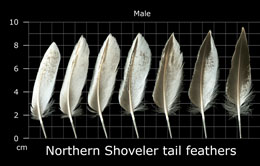

In [ ]:
# download image

img_url = 'https://www.fws.gov//lab/featheratlas/images/feathers/thumbs/NSHO_tail_male.jpg'
img_res = requests.get(img_url)
img = Image.open(BytesIO(img_res.content))
img

In [1]:
import torch

In [2]:
c = torch.nn.Conv2d(1, 8, 5, stride=2)
c

Conv2d(1, 8, kernel_size=(5, 5), stride=(2, 2))

In [3]:
c.weight.shape

torch.Size([8, 1, 5, 5])

In [ ]:
# convert the conv layer to an equivalent linear layer
c = torch.nn.Conv2d(1, 8, 5, stride=2)
r = c.weight
l = torch.nn.Linear(28*28, 8*12*12)
w = l.weight.data.view(28, 28, 8, 12, 12)
w.zero_()
w[0:5, 0:5, :, :, :] = r

In [12]:
from torch import nn
model = nn.Sequential(
	nn.Conv2d(1, 8, 5, stride=2),
	nn.ReLU(),
	nn.Flatten(),
	nn.Linear(8*12*12, 10),
	nn.Softmax(dim=1)
)

In [13]:
sum(param.numel() for param in model.parameters())

11738

In [20]:
8*12*12

1152

In [10]:
r.shape

torch.Size([8, 1, 5, 5])

In [11]:
import torch

# 1. Define Layer Parameters
in_channels = 1
out_channels = 8
kernel_size = 5
stride = 2
h_in, w_in = 28, 28

# 2. Define Layers
# Using bias=False for a direct weight-to-weight comparison
conv_layer = torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, bias=False)

# Calculate output dimensions
h_out = (h_in - kernel_size) // stride + 1
w_out = (w_in - kernel_size) // stride + 1

linear_layer = torch.nn.Linear(h_in * w_in, out_channels * h_out * w_out, bias=False)

# 3. Systematically Map Weights
# Get a reference to the weight tensors
conv_weights = conv_layer.weight.data
linear_weights = linear_layer.weight.data

# Zero out the linear weights before populating
linear_weights.zero_()

# Iterate through each output channel, and each output pixel (row, col)
for c_out in range(out_channels):
    for i_out in range(h_out):
        for j_out in range(w_out):
            # This is the row in the linear weight matrix corresponding to
            # the output at (c_out, i_out, j_out)
            linear_row_idx = c_out * (h_out * w_out) + i_out * w_out + j_out
            
            # Iterate through the kernel elements
            for i_k in range(kernel_size):
                for j_k in range(kernel_size):
                    # This is the column in the linear weight matrix corresponding to
                    # the input pixel the kernel is currently over
                    input_row = i_out * stride + i_k
                    input_col = j_out * stride + j_k
                    linear_col_idx = input_row * w_in + input_col

                    # Assign the conv weight to the correct spot in the linear matrix
                    linear_weights[linear_row_idx, linear_col_idx] = conv_weights[c_out, 0, i_k, j_k]

# 4. (Optional) Verification
print("Verification:")
# Create a random input tensor
input_tensor = torch.randn(1, in_channels, h_in, w_in)

# Pass through both layers
output_conv = conv_layer(input_tensor)
output_linear = linear_layer(input_tensor.view(1, -1)) # Pass flattened input

# Check if the flattened outputs are nearly identical
print(f"Outputs are equivalent: {torch.allclose(output_conv.view(1, -1), output_linear)}")
# Outputs are equivalent: True

Verification:
Outputs are equivalent: False


In [18]:
x = torch.zeros(1,4)
x[0, :] = [0.,4,8,12]
x 

TypeError: can't assign a list to a torch.FloatTensor

In [19]:
28*28

784